# Week 3 Assignment: Census Data Exploration

## Examining Los Angeles Chinatown - Renter Characteristics

This notebook will take a closer look at renter status in Los Angeles Chinatown using the **American Community Survey (ACS) 2020 5-year dataset** from the [U.S. Census Data Portal](https://data.census.gov/table?q=B25003:+TENURE&g=0500000US06037$1400000&tid=ACSDT5Y2020.B25003).

- Import ACS data
- Overlay with Los Angeles County census tracts
- Extract relevant census tracts in Chinatown (as defined by the Los Angeles Times from the City of Los Angeles geoportal)
- Visualize renter status by census tract

<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

Next, import "Tenure" data (Table B25003) from 2020 ACS 5-year.

In [2]:
# Read and add csv as 'tenure_la_county'.
tenure_la_county = pd.read_csv('data/ACSDT5Y2020.B25003-Tenure-Data.csv')

In [3]:
tenure_la_county.head()

,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Annotation of Margin of Error!!Total:,Annotation of Estimate!!Total:,Estimate!!Total:!!Owner occupied,Margin of Error!!Total:!!Owner occupied,Annotation of Margin of Error!!Total:!!Owner occupied,Annotation of Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied,Margin of Error!!Total:!!Renter occupied,Annotation of Margin of Error!!Total:!!Renter occupied,Annotation of Estimate!!Total:!!Renter occupied
0,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1505,112,NaN,NaN,878,138,NaN,NaN,627,119,NaN,NaN
1,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1341,151,NaN,NaN,1005,117,NaN,NaN,336,164,NaN,NaN
2,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1430,208,NaN,NaN,611,152,NaN,NaN,819,155,NaN,NaN
3,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1513,325,NaN,NaN,308,136,NaN,NaN,1205,323,NaN,NaN
4,1400000US06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",969,174,NaN,NaN,110,78,NaN,NaN,859,187,NaN,NaN


### Cleaning the data

The imported data comes with extra columns (like margin of error) that we don't particularly need for this analysis. Additionally, the 'Geography' column includes FIPS code but not quite in the format we want. Let's fix this!

In [4]:
# Create a new data frame to clean the original dataset
renters_la = tenure_la_county

# List columns to keep
columns_to_keep = ['Geography',
                   'Geographic Area Name',
                   'Estimate!!Total:',
                   'Estimate!!Total:!!Owner occupied',
                   'Estimate!!Total:!!Renter occupied']

# Update new dataframe to includes desired columns
renters_la = renters_la[columns_to_keep]
renters_la

,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied
0,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1505,878,627
1,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1341,1005,336
2,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1430,611,819
3,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1513,308,1205
4,1400000US06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",969,110,859
...,...,...,...,...,...
2493,1400000US06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",0,0,0
2494,1400000US06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",0,0,0
2495,1400000US06037990100,"Census Tract 9901, Los Angeles County, California",0,0,0
2496,1400000US06037990200,"Census Tract 9902, Los Angeles County, California",0,0,0


In [5]:
renters_la['Geography'] = renters_la['Geography'].str.replace('1400000US','')
renters_la.rename(columns = {'Geography': 'FIPS',
                             'Estimate!!Total:': 'Total Households',
                             'Estimate!!Total:!!Owner occupied': 'Owner Occupied Households',
                             'Estimate!!Total:!!Renter occupied': 'Renter Occupied Households'}, inplace=True)

/tmp/ipykernel_1641/1767400689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renters_la['Geography'] = renters_la['Geography'].str.replace('1400000US','')
/tmp/ipykernel_1641/1767400689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renters_la.rename(columns = {'Geography': 'FIPS',


In [6]:
# Check to see that columns were renamed
renters_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FIPS                        2498 non-null   object
 1   Geographic Area Name        2498 non-null   object
 2   Total Households            2498 non-null   int64 
 3   Owner Occupied Households   2498 non-null   int64 
 4   Renter Occupied Households  2498 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 97.7+ KB


In [7]:
# Checks new dataframe
renters_la.head()

,FIPS,Geographic Area Name,Total Households,Owner Occupied Households,Renter Occupied Households
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1505,878,627
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1341,1005,336
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1430,611,819
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1513,308,1205
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",969,110,859


### Overview of Los Angeles County: **Owner-Occupied Households vs. Renter-Occupied Households**

In [8]:
# Counts total households in Los Angeles County
total_households_la_county = renters_la['Total Households'].sum()
total_households_la_county

3332504

In [9]:
# Counts total owner-occupied households in Los Angeles County
total_owner_households_la_county = renters_la['Owner Occupied Households'].sum()

# Counts total renter-occupied households in Los Angeles County
total_renter_households_la_county = renters_la['Renter Occupied Households'].sum()

In [10]:
# Compiles summary statistics into a dataframe
la_county_data = {'Tenure': ['Owner-Occupied', 'Renter-Occupied'],
                  'Total Households': [total_owner_households_la_county, total_renter_households_la_county]}

la_county = pd.DataFrame(la_county_data)
la_county

,Tenure,Total Households
0,Owner-Occupied,1534472
1,Renter-Occupied,1798032


#### Los Angeles County Data Graph

<AxesSubplot: title={'center': 'Los Angeles County: Owner-Occupied vs. Renter-Occupied'}, xlabel='Tenure'>

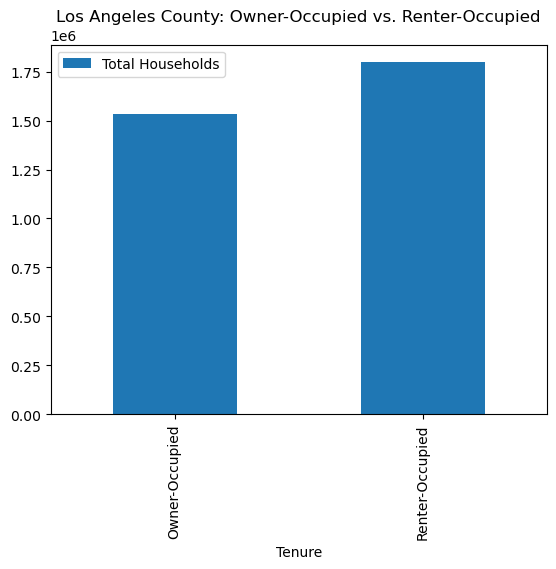

In [11]:
la_county.plot.bar(x = 'Tenure', y = 'Total Households', title = 'Los Angeles County: Owner-Occupied vs. Renter-Occupied')

### Mapping Tenure Status in Los Angeles County

In [12]:
# read in a geojson file downloaded from the LA Times
tracts = gpd.read_file('data/Census_Tracts_2020.geojson')

# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

# Cleans dataframe to include only FIPS and geometry columns
tracts = tracts[['FIPS', 'geometry']]
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,FIPS,geometry
0,06037101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,06037101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,06037101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,06037101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,06037101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [13]:
# Merge tenure data to census tracts
tracts_tenure_la = tracts.merge(renters_la, on='FIPS')
tracts_tenure_la.head()

,FIPS,geometry,Geographic Area Name,Total Households,Owner Occupied Households,Renter Occupied Households
0,06037101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...","Census Tract 1011.10, Los Angeles County, Cali...",1505,878,627
1,06037101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...","Census Tract 1011.22, Los Angeles County, Cali...",1341,1005,336
2,06037101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...","Census Tract 1012.20, Los Angeles County, Cali...",1430,611,819
3,06037101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...","Census Tract 1012.21, Los Angeles County, Cali...",1513,308,1205
4,06037101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...","Census Tract 1012.22, Los Angeles County, Cali...",969,110,859


<AxesSubplot: >

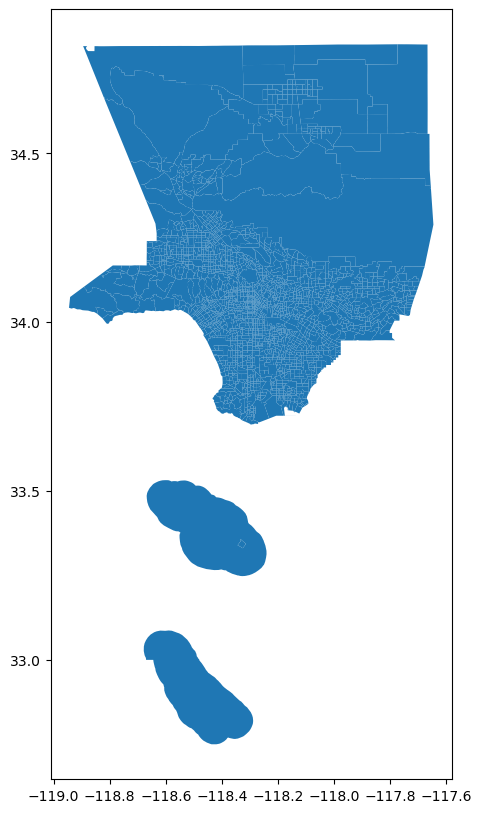

In [14]:
tracts_tenure_la.plot(figsize=(12,10))

#### Los Angeles County Owner-Occupied Households Map

<AxesSubplot: >

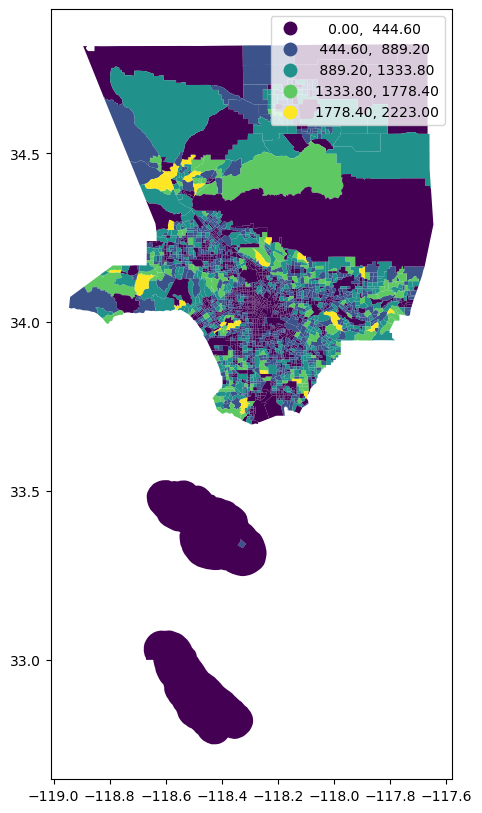

In [15]:
tracts_tenure_la.plot(figsize=(12,10),
                 column='Owner Occupied Households',
                 legend=True, 
                 scheme='equal_interval')

#### Los Angeles County Owner-Occupied Households Map

<AxesSubplot: >

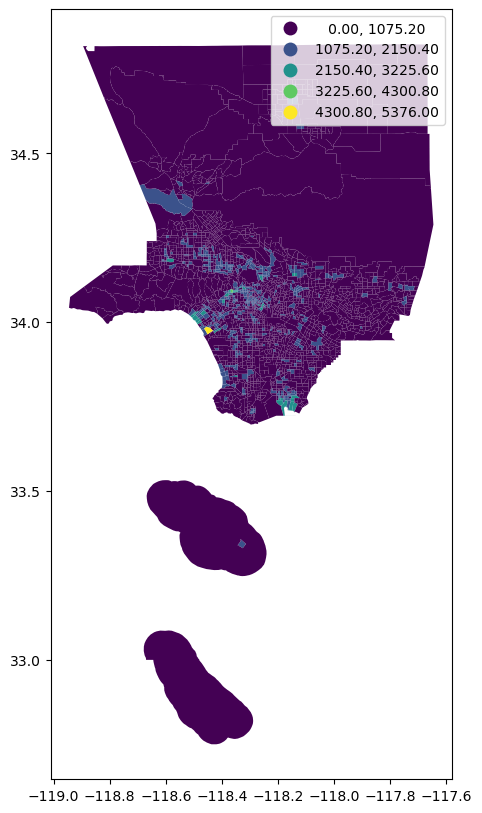

In [16]:
tracts_tenure_la.plot(figsize=(12,10),
                 column='Renter Occupied Households',
                 legend=True, 
                 scheme='equal_interval')

### Mapping Tenure Status to Los Angeles Chinatown

In [17]:
# Import Los Angeles Neighborhood Boundaries dataset
la_neighborhoods = gpd.read_file('data/LA_Times_Neighborhood_Boundaries.zip')
la_neighborhoods.head()

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


<AxesSubplot: >

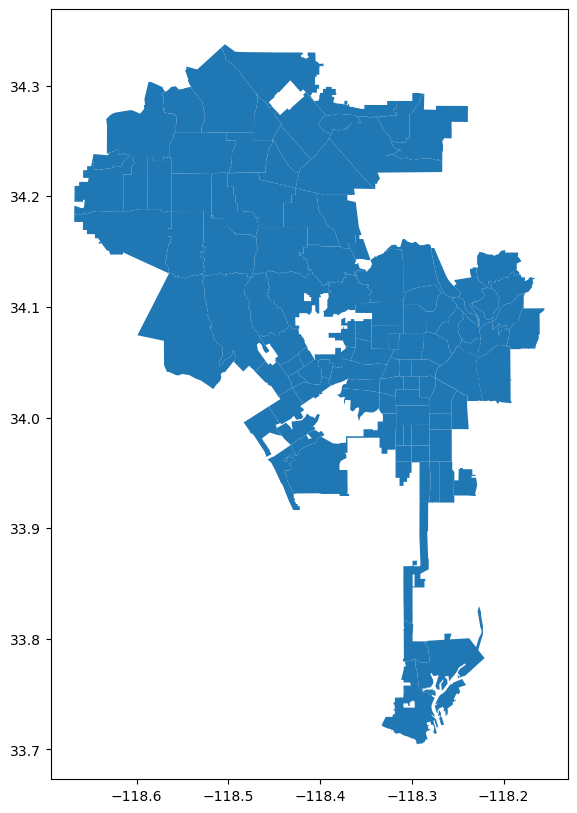

In [18]:
la_neighborhoods.plot(figsize=(12,10))

In [19]:
# Filter dataset to get Chinatown geometry
la_chinatown = la_neighborhoods[la_neighborhoods['name'] == 'Chinatown']
la_chinatown

,OBJECTID,name,geometry
20,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."


<AxesSubplot: >

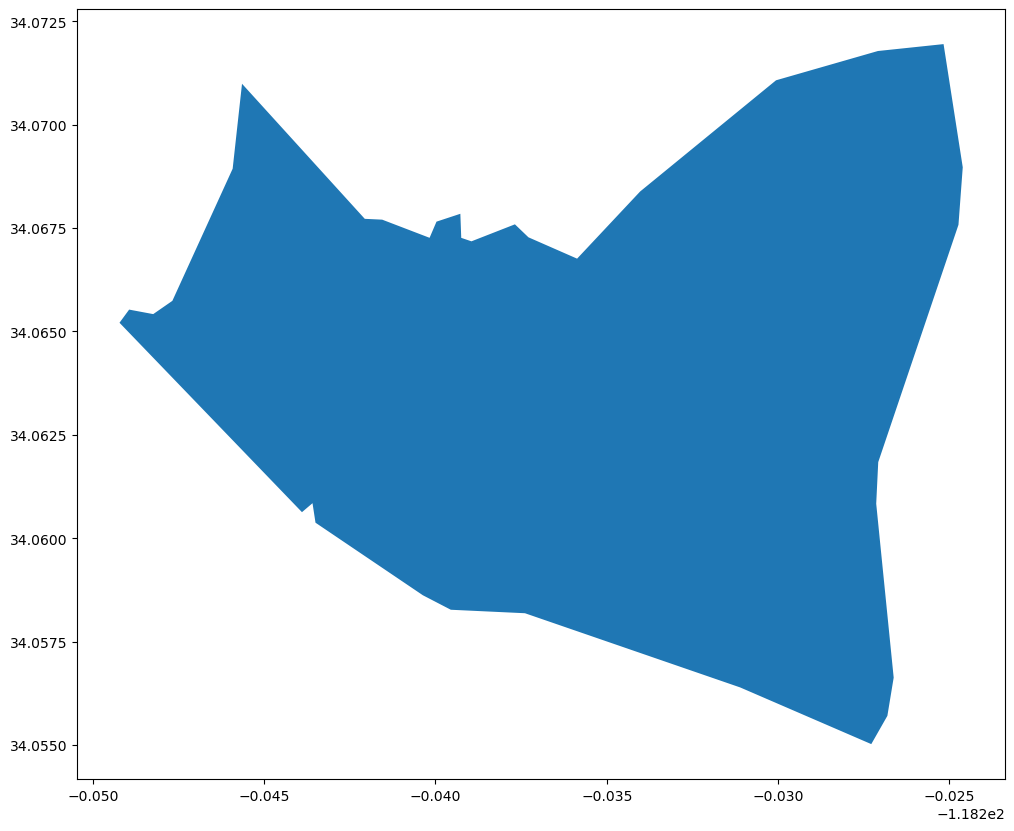

In [20]:
# Shows map of Chinatown
la_chinatown.plot(figsize=(12,10))

In [21]:
# Clips Los Angeles County tenure data by census tract to the Los Angeles Chinatown dataset
chinatown_tracts = gpd.clip(tracts_tenure_la, la_chinatown)
chinatown_tracts

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,FIPS,geometry,Geographic Area Name,Total Households,Owner Occupied Households,Renter Occupied Households
580,06037206020,"POLYGON ((-118.23693 34.05881, -118.23680 34.0...","Census Tract 2060.20, Los Angeles County, Cali...",281,0,281
592,06037207102,"POLYGON ((-118.24240 34.06142, -118.24239 34.0...","Census Tract 2071.02, Los Angeles County, Cali...",1386,34,1352
591,06037207101,"POLYGON ((-118.24733 34.06384, -118.24707 34.0...","Census Tract 2071.01, Los Angeles County, Cali...",1742,46,1696
593,06037207103,"POLYGON ((-118.23587 34.06676, -118.23613 34.0...","Census Tract 2071.03, Los Angeles County, Cali...",925,30,895
529,06037197700,"POLYGON ((-118.23925 34.06726, -118.24039 34.0...","Census Tract 1977, Los Angeles County, California",2141,269,1872
579,06037206010,"POLYGON ((-118.22693 34.06235, -118.22734 34.0...","Census Tract 2060.10, Los Angeles County, Cali...",1418,102,1316
2468,06037980010,"MULTIPOLYGON (((-118.22693 34.07179, -118.2270...","Census Tract 9800.10, Los Angeles County, Cali...",60,26,34


<AxesSubplot: >

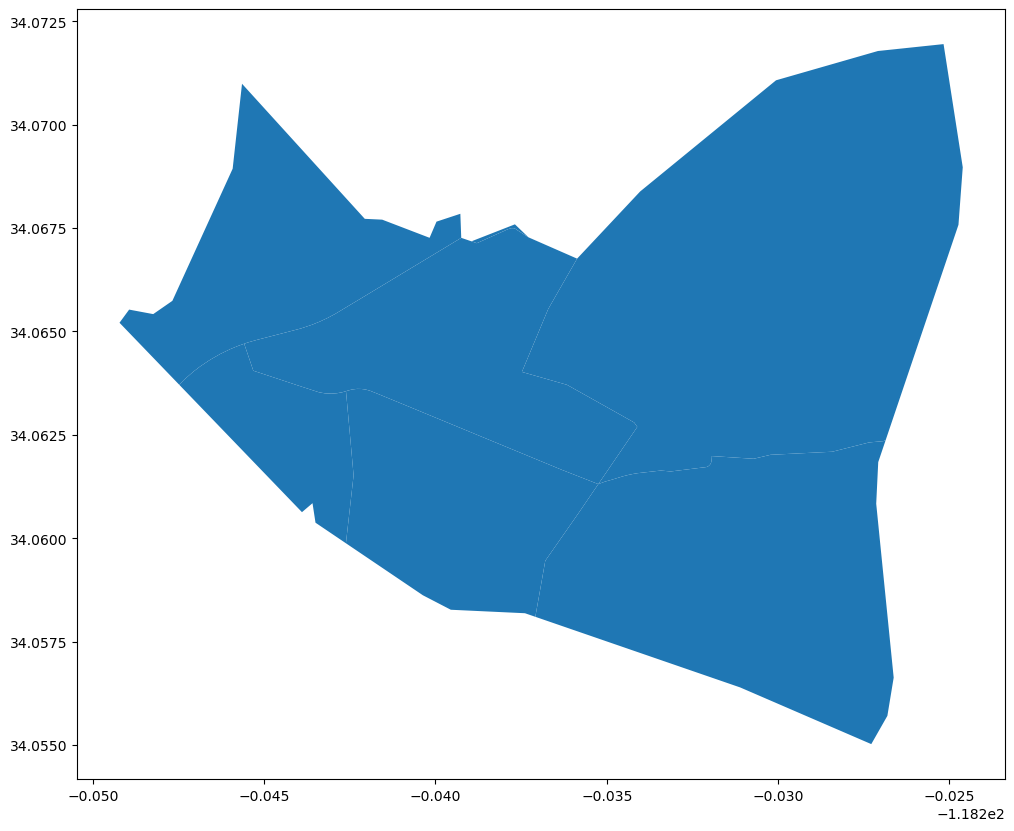

In [22]:
# Maps census tracts in Los Angeles Chinatown
chinatown_tracts.plot(figsize=(12,10))

<AxesSubplot: >

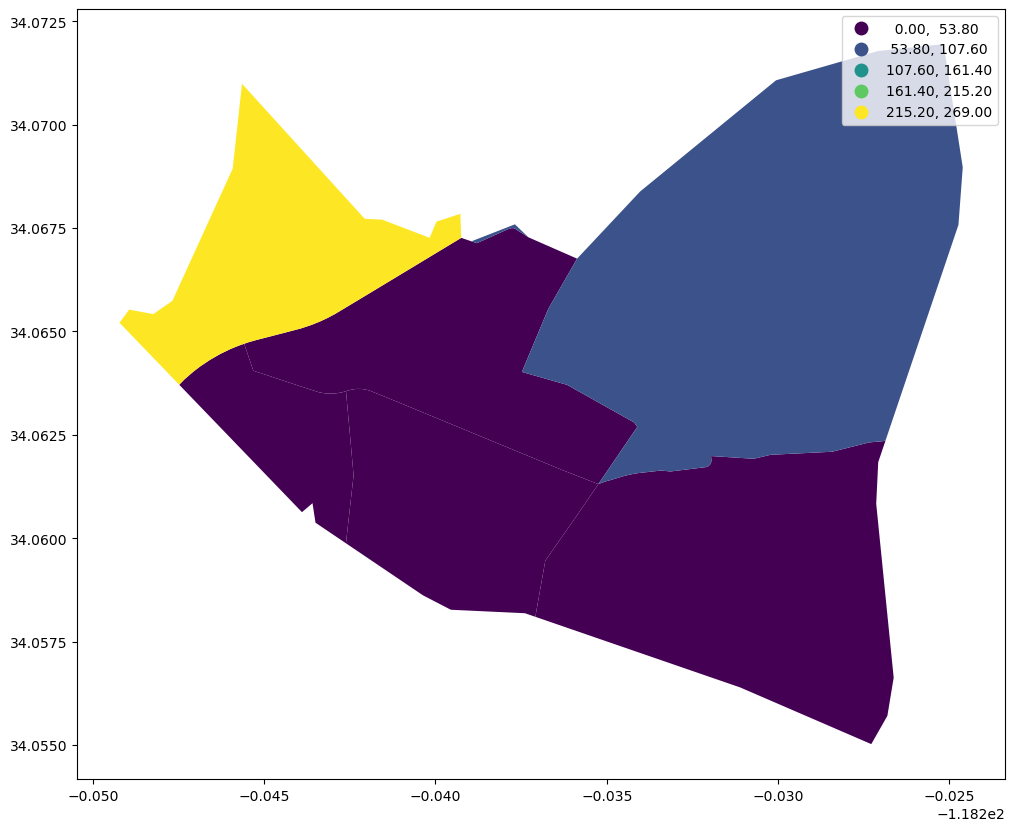

In [23]:
# Maps Owner-Occupied Households by census tract in Los Angeles Chinatown
chinatown_tracts.plot(figsize=(12,10),
                 column='Owner Occupied Households',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

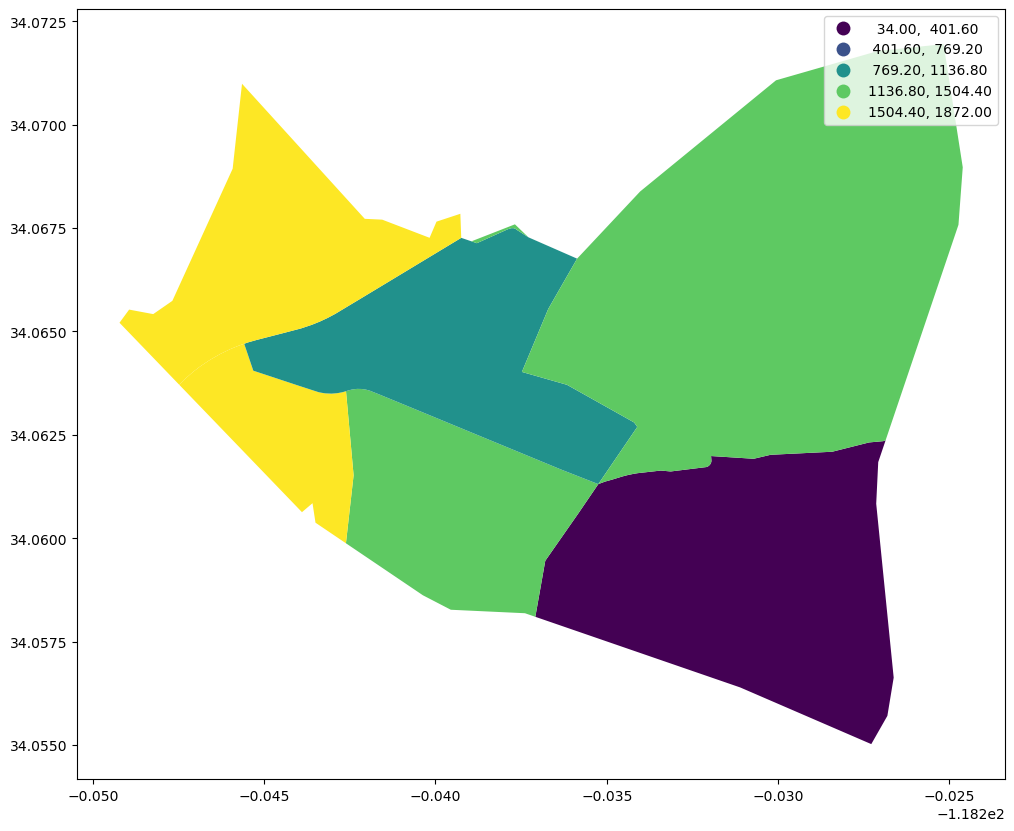

In [24]:
# Maps Renter-Occupied Households by census tract in Los Angeles Chinatown
chinatown_tracts.plot(figsize=(12,10),
                 column='Renter Occupied Households',
                 legend=True, 
                 scheme='equal_interval')

## Findings
### Tenure Status: Los Angeles Chinatown vs. Los Angeles County

In [25]:
# Counts total households in LA Chinatown
total_households_chinatown = chinatown_tracts['Total Households'].sum()

# Counts total owner-occupied households in LA Chinatown
total_owner_households_chinatown = chinatown_tracts['Owner Occupied Households'].sum()

# Counts total renter-occupied households in LA Chinatown
total_renter_households_chinatown = chinatown_tracts['Renter Occupied Households'].sum()

In [26]:
# Compiles summary statistics into dataframe and by percentages instead of raw data for comparison

tenure_data = {'Area': ['Los Angeles County', 'Los Angeles Chinatown'],
               'Owner-Occupied (%)': [total_owner_households_la_county/total_households_la_county*100, total_owner_households_chinatown/total_households_chinatown*100],
               'Renter-Occupied (%)': [total_renter_households_la_county/total_households_la_county*100, total_renter_households_chinatown/total_households_chinatown*100]}

tenure_summary = pd.DataFrame(tenure_data)
tenure_summary

,Area,Owner-Occupied (%),Renter-Occupied (%)
0,Los Angeles County,46.045616,53.954384
1,Los Angeles Chinatown,6.374953,93.625047


Text(0.5, 0, 'Households (%)')

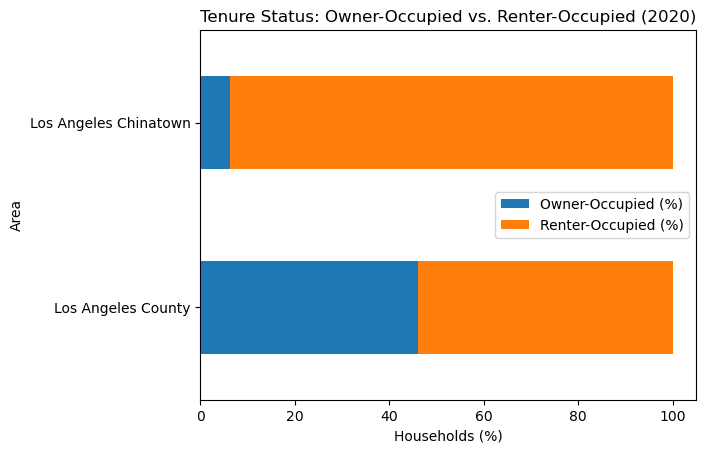

In [27]:
import matplotlib.pyplot as plt # Import matplotlib to edit graph

# Create summary graph
tenure_summary.plot.barh(x='Area', stacked=True, title = 'Tenure Status: Owner-Occupied vs. Renter-Occupied (2020)')
plt.xlabel("Households (%)") # Sets label

## **Conclusion**

From this census exploration exercise, we found that Chinatown has higher rates of renter-occupied households at approximately 93.6% compared to approximately 54.0% of all Los Angeles County households.

*Please note that this percentage includes all census tracts **intersecting** Los Angeles Chinatown as census tracts do not cleanly fit within Chinatown's boundaries.*